In [150]:
### 2021.09.07. 작성

## English Name Trend 살피기
- 목적: 영어이름 만들기
- 상세내용: 
    영어이름을 만드려 하는데 너무 올드한 느낌의 이름도 싫고, 최근 대세인 영어이름 중에서 하나를 고르고 싶다. 어느 이름이 요즘의 trend일까? 이를 알기 위해 미국의 아기이름을 년도별로 정리해놓은 데이터를 이용하기로 한다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os

#현재 폴더 경로; 작업 폴더 기준
print(os.getcwd())

C:\Users\wjdqh\Desktop\DataScience\러닝스푼즈\파이썬기초\Ch2)Pandas_Basic


In [15]:
current_path = os.getcwd()

current_path = current_path.replace('\\','/')
current_path

'C:/Users/wjdqh/Desktop/DataScience/러닝스푼즈/파이썬기초/Ch2)Pandas_Basic'

In [23]:
# 파일 정보 확인
import glob
for file in glob.glob(current_path + '/data/baby*'): print(file)

C:/Users/wjdqh/Desktop/DataScience/러닝스푼즈/파이썬기초/Ch2)Pandas_Basic/data\babyNamesUS.csv
C:/Users/wjdqh/Desktop/DataScience/러닝스푼즈/파이썬기초/Ch2)Pandas_Basic/data\babyNamesUS.xlsx


In [24]:
# 파일 읽어오기
file_dir = current_path + '/data/babyNamesUS.csv'
baby_names = pd.read_csv(file_dir)
baby_names.head()

,StateCode,Sex,YearOfBirth,Name,Number
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [25]:
# 파일이 어느 년도까지의 정보를 가지고 있는지 확인한다
print(min(baby_names.YearOfBirth))
print(max(baby_names.YearOfBirth))

1910
2015


#### * Comment : 안타깝게도 2015년도 출생까지의 이름만 담고 있다. 하지만 2015년생이면 현재 2021년 한국나이 기준으로 7세이므로, 영어이름으로 사용할 용도로는 적당한 trend라고 볼 수 있겠다.

## 가장 많이 사용된 이름 상위권
 - 전체
 - 성별
 - 년도 구간별 + 성별

#### - 전체

In [30]:
display(baby_names.groupby('Name').agg({'Number':'sum'}).sort_values('Number',ascending=False).head(10))

'''
상위권에 남자로 추정되는 이름이 대부분인 것으로 확인된다.
'''

,Number
Name,
Michael,729890
James,696321
Robert,677403
John,673291
David,617946
Mary,520762
William,519198
Richard,383524
Christopher,379723


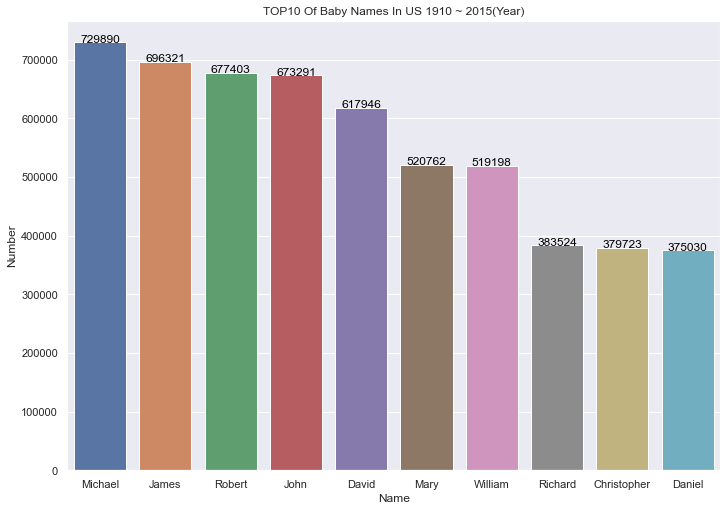

TOP10 Names:  ['Michael', 'James', 'Robert', 'John', 'David', 'Mary', 'William', 'Richard', 'Christopher', 'Daniel']


In [76]:
# 시각화
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
cnt_name = baby_names.groupby('Name').agg({'Number':'sum'}).sort_values('Number',ascending=False).reset_index().head(10)

g = sns.barplot(data = cnt_name, x = 'Name', y = 'Number')

for index, row in cnt_name.iterrows():
    g.text(row.name,row.Number, round(row.Number), color='black', ha="center")
    
plt.title('TOP10 Of Baby Names In US 1910 ~ 2015(Year)')
plt.show()
print("TOP10 Names: ", cnt_name.Name.to_list())

#### - 성별

Sex,Name,F
13510,Mary,519443
9248,Jennifer,325383
6009,Elizabeth,273414
15503,Patricia,257008
12292,Linda,249999
9398,Jessica,247326
2413,Barbara,217189
17042,Sarah,194021
14028,Michelle,189041
1974,Ashley,186366


Sex,Name,M
13999,Michael,725757
8662,James,693271
16404,Robert,674934
9606,John,670893
4821,David,615943
19996,William,517796
16303,Richard,382479
3943,Christopher,378022
4630,Daniel,373549
9776,Joseph,341757


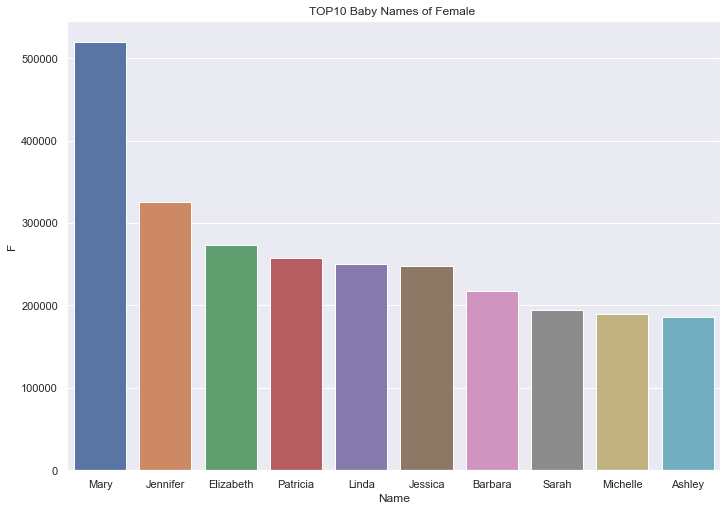

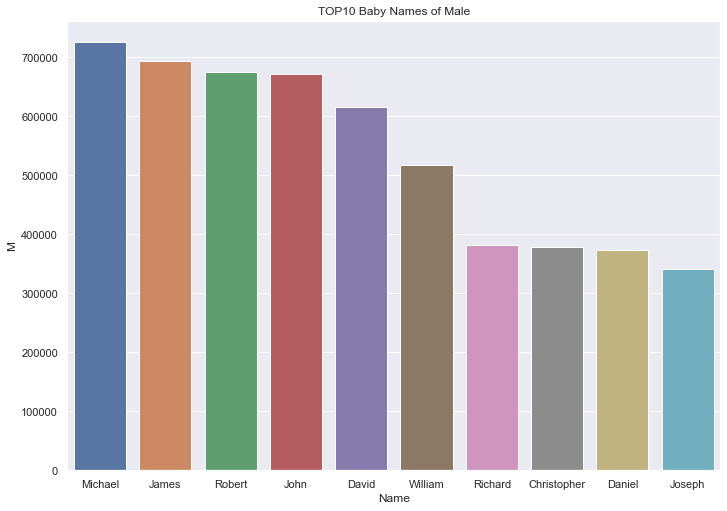

TOP10 Baby Names Of Female:  ['Mary' 'Jennifer' 'Elizabeth' 'Patricia' 'Linda' 'Jessica' 'Barbara'
 'Sarah' 'Michelle' 'Ashley']
 
TOP10 Baby Names Of Male:  ['Michael' 'James' 'Robert' 'John' 'David' 'William' 'Richard'
 'Christopher' 'Daniel' 'Joseph']


In [96]:
names_sex = baby_names.pivot_table(values='Number',index='Name',columns='Sex',aggfunc='sum', fill_value = 0).reset_index()
top10_f = names_sex[['Name','F']].sort_values('F',ascending=False).head(10)
top10_m = names_sex[['Name','M']].sort_values('M',ascending=False).head(10)
display(top10_f), display(top10_m)

g = sns.barplot(y='F', x='Name', data=top10_f)
plt.title("TOP10 Baby Names of Female ", size=12)
plt.show()

g1 = sns.barplot(y='M', x='Name', data=top10_m)
plt.title('TOP10 Baby Names of Male', size = 12)
plt.show()

print("TOP10 Baby Names Of Female: ", top10_f.Name.values)
print(' ')
print("TOP10 Baby Names Of Male: ", top10_m.Name.values)

#### - 연도 구간별 + 성별

In [108]:
year_list = list(baby_names.YearOfBirth.unique())
#print(type(year_list[0]))
full_years = list(range(1910,2016))
#min(full_years), max(full_years)

# 데이터에 빠진 년도 없는지 확인
[i for i in full_years if i not in year_list]

[]

In [110]:
def make_year_range(year):
    # 최근으로 올수록 trend 변화가 빠르게 변했을 것으로 생각하여 구간 간격을 주관적으로 정하였음
    if year <= 1940:
        return "before1940"
    elif year <= 1960:
        return "before1960"
    elif year <= 1990:
        return "before1990"
    elif year <= 2001:
        return "before2001"
    elif year <= 2008:
        return "before2008"
    elif year <= 2015:
        return "before2015"
    
baby_names['year_range'] = baby_names['YearOfBirth'].apply(lambda x: make_year_range(x))

baby_names.head()

,StateCode,Sex,YearOfBirth,Name,Number,year_range
0,AK,F,1910,Mary,14,before1940
1,AK,F,1910,Annie,12,before1940
2,AK,F,1910,Anna,10,before1940
3,AK,F,1910,Margaret,8,before1940
4,AK,F,1910,Helen,7,before1940


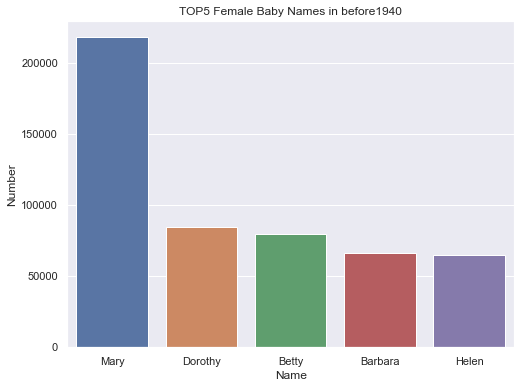

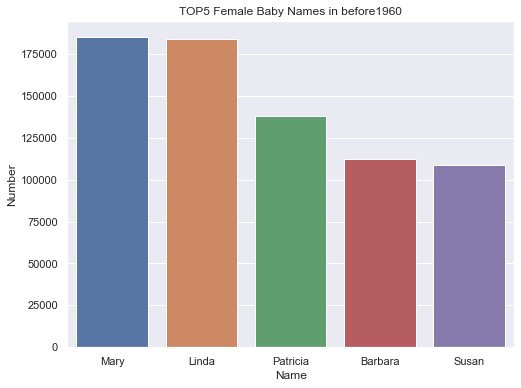

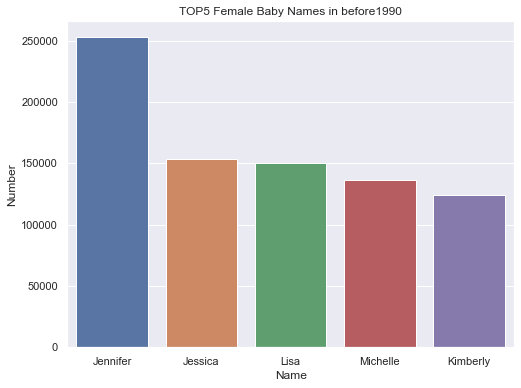

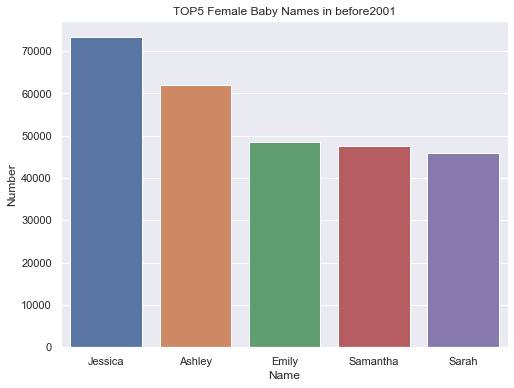

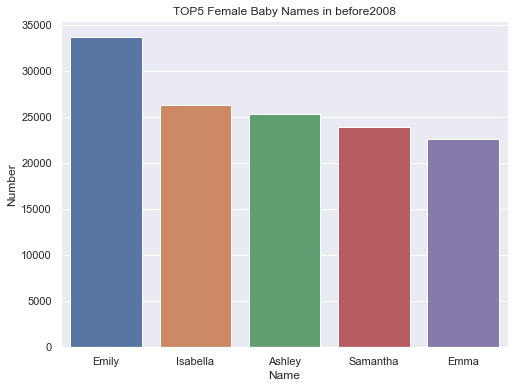

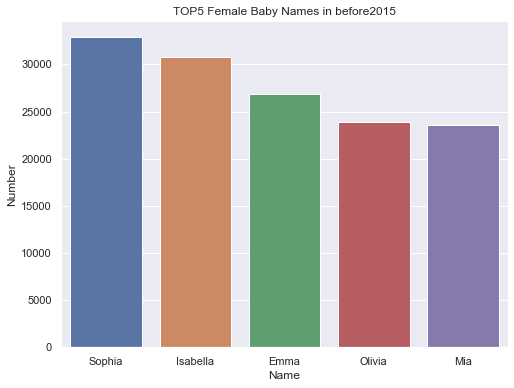

In [132]:
sns.set(rc={'figure.figsize':(8,6)})
female_names = baby_names[baby_names.Sex == 'F']

for year_range in female_names.year_range.unique():
    result_part = female_names[female_names.year_range == year_range].groupby('Name').agg({'Number':'sum'}).reset_index().sort_values('Number',ascending=False).head()
    #display(result_part)
    sns.barplot(data = result_part, x = 'Name', y = 'Number')
    plt.title(f'TOP5 Female Baby Names in {year_range}')
    plt.show()

#### 시대별 Female Name TOP 확인결과
- 1960년 이전까지는 Mary라는 이름이 압도적이었다가, 1960년도 이후 아예 사라지고 Jessica가 새로운 대세가 된다!
- 조금 올드하다고 생각하는 이름들이 2000년대에 Baby Name TOP에 있어서 놀랐다!
- Emma는 엠마 왓슨이나 엠마 스톤때문에 많이들 쓰는걸까..?

In [134]:
# 가장 최근년도 트렌드 살피기
female_names[female_names['YearOfBirth'] == 2015].groupby('Name').agg({'Number':'sum'}).sort_values('Number',ascending=False).head(10)

,Number
Name,
Emma,4340
Sophia,4253
Mia,4054
Olivia,4049
Isabella,3517
Emily,3023
Ava,2845
Sofia,2771
Abigail,2699


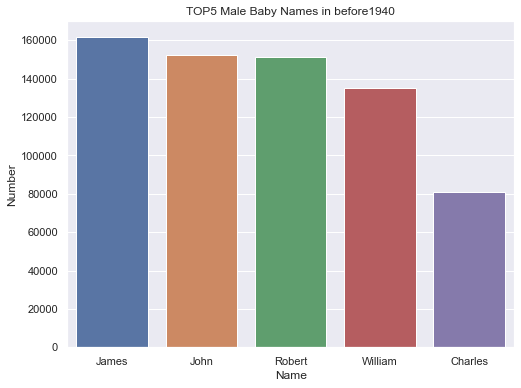

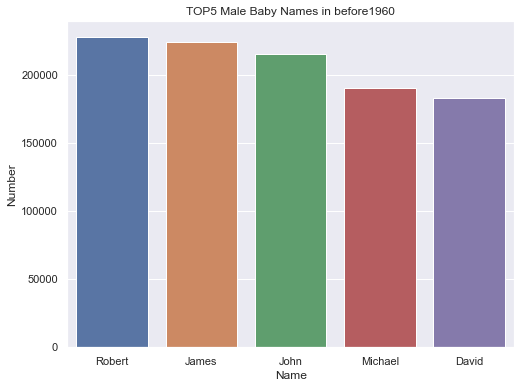

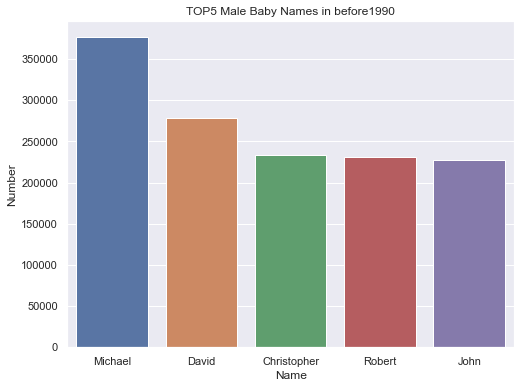

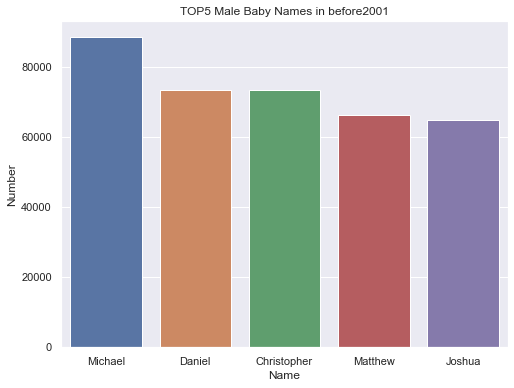

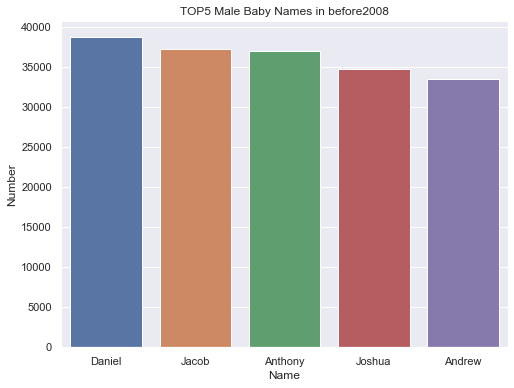

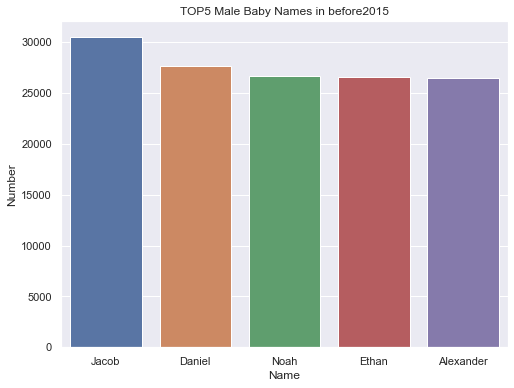

In [135]:
## 남자
male_names = baby_names[baby_names.Sex == 'M']

for year_range in male_names.year_range.unique():
    result_part = male_names[male_names.year_range == year_range].groupby('Name').agg({'Number':'sum'}).reset_index().sort_values('Number',ascending=False).head()
    #display(result_part)
    sns.barplot(data = result_part, x = 'Name', y = 'Number')
    plt.title(f'TOP5 Male Baby Names in {year_range}')
    plt.show()

#### 시대별 Male baby name 확인결과
- 남자 아이 이름도 최근으로 와도 무난한 이름들이 대세인 것으로 보인다!
- 그래도 "before2015" 구간은 조금 변화가 보이는데, "Noah", "Ethan"과 같은 이름이 등장한다.

In [142]:
male_names.head(2)

,StateCode,Sex,YearOfBirth,Name,Number,year_range
13979,AK,M,1910,John,8,before1940
13980,AK,M,1910,James,7,before1940


In [144]:
print('<남자 아이 이름 다양성 변화>')
display(male_names.groupby('year_range').agg({'Name':'nunique','Sex':'count'}).rename(columns = {'Name':'name_cnt','Sex':'total_cnt'}))
print('========================================')
print('<여자 아이 이름 다양성 변화>')
display(female_names.groupby('year_range').agg({'Name':'nunique','Sex':'count'}).rename(columns = {'Name':'name_cnt','Sex':'total_cnt'}))

<남자 아이 이름 다양성 변화>


,name_cnt,total_cnt
year_range,,
before1940,1928,67315
before1960,1965,64249
before1990,4489,131713
before2001,4863,66781
before2008,4639,49079
before2015,4844,51930


<여자 아이 이름 다양성 변화>


,name_cnt,total_cnt
year_range,,
before1940,2255,89829
before1960,3056,94527
before1990,7497,211824
before2001,7439,91875
before2008,6967,64643
before2015,6875,64810


## 중성적인 느낌의 이름을 찾고 싶다면?
- 성별에 따른 사용 수의 차이가 적은 이름을 찾는다!

In [148]:
total_baby_name = baby_names.pivot_table(values='Number',columns='Sex',index='Name',aggfunc='sum',fill_value=0)
total_baby_name['total_num'] = total_baby_name['F'] + total_baby_name['M']
total_baby_name['diff_num'] = abs(total_baby_name['F'] - total_baby_name['M'])
total_baby_name.head()

Sex,F,M,total_num,diff_num
Name,,,,
Aadan,0,18,18,18
Aaden,0,855,855,855
Aadhav,0,14,14,14
Aadhya,188,0,188,188
Aadi,0,116,116,116


In [149]:
total_baby_name['diff_ratio'] = total_baby_name['diff_num'] / total_baby_name['total_num']
total_baby_name.head(3)

Sex,F,M,total_num,diff_num,diff_ratio
Name,,,,,
Aadan,0,18,18,18,1.0
Aaden,0,855,855,855,1.0
Aadhav,0,14,14,14,1.0


In [153]:
# diff 비율이 5% 내로 들어오는 이름 중, 많이 사용된 이름 확인하기
total_baby_name[total_baby_name['diff_ratio']<0.05].sort_values('total_num',ascending=False).head(10)

Sex,F,M,total_num,diff_num,diff_ratio
Name,,,,,
Riley,15539,14929,30468,610,0.020021
Emerson,2341,2471,4812,130,0.027016
Kris,2100,2055,4155,45,0.010830
Carey,1969,1841,3810,128,0.033596
Stevie,1795,1649,3444,146,0.042393
Merle,1623,1612,3235,11,0.003400
Milan,1044,1071,2115,27,0.012766
Baby,397,436,833,39,0.046819
Azariah,355,372,727,17,0.023384


#### "Riley"가 중성적이라고 볼 수 있는 이름 중, 가장 많이 사용된 Baby Name이다. 
#### 따라서 Riley라는 이름을 추천, 시대별 trend까지 고려하고 싶다면 위에서 진행한 year_range를 추가하여 top list를 다시 뽑아보면 된다.

In [156]:
# Riley라는 이름이 너무 올드한건 아닌지 확인해보려 아래 코드를 작성하여 확인해보았다.
baby_names[baby_names.Name == 'Riley'].groupby('year_range').agg({'Number':'sum'})

,Number
year_range,
before1940,516
before1960,370
before1990,1099
before2001,7656
before2008,10629
before2015,10198


In [158]:
baby_names.groupby('year_range').agg({'Number':'sum'})

'''
추가로, 해당 데이터를 통해 출생률 변화 정도를 파악해볼 수도 있다. 
출생율이 1990년 이전까지는 증가하다가 2000년대로 들어오면서 급격하게 줄어드는 것을 볼 수 있다.
'''

,Number
year_range,
before1940,6389993
before1960,10456481
before1990,19431544
before2001,8309261
before2008,5175833
before2015,4703409
